In [ ]:
!pip install tensorflow_io

In [ ]:
# Imports
import pandas as pd
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import tensorflow_io as tfio
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

In [ ]:
def decode_image(image_path, size=256):
  # read the image from image_path
  image = tf.io.read_file(image_path)
  # convert the image into a 3D tensor
  image = tfio.image.decode_dicom_image(image, dtype=tf.uint8,color_dim=True,scale='preserve')
  # convert image datatype to float32
  image = tf.image.convert_image_dtype(image, tf.float32)
  # squeeze the image from shape (1,1024,1024,1) to (1024,1024,1)
  image =tf.squeeze(image,[0])
  # cons = tf.constant([1,1,3], tf.int32)
  # using tf.tile convert image shape (1024,1024,1) tp (1024,1024,3)
  # image=tf.tile(image,cons)
  image=tf.tile(image, tf.constant([1,1,3], tf.int32))
  # resize the image
  image=tf.image.resize(image,size=[size,size])

  return image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model = tf.keras.models.load_model('drive/My Drive/siim_model')

This image does not have Pneumo
This image does not have Pneumo
This image does not have Pneumo
This image does not have Pneumo


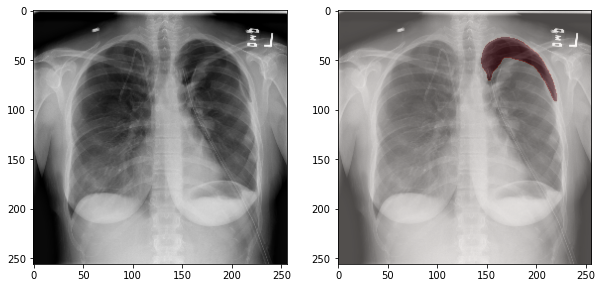

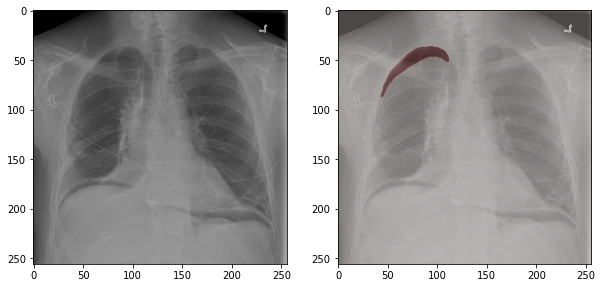

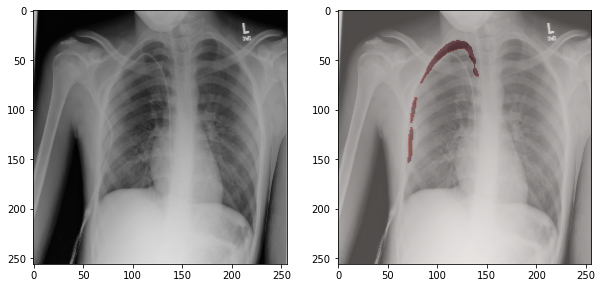

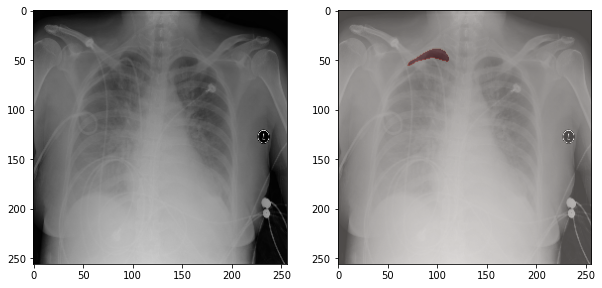

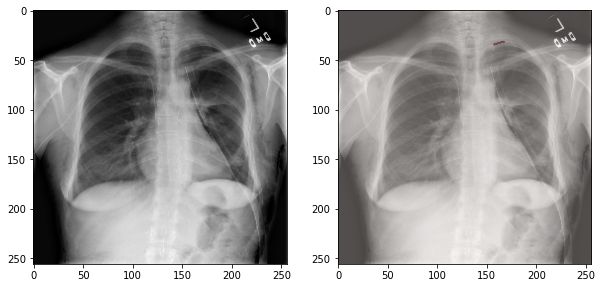

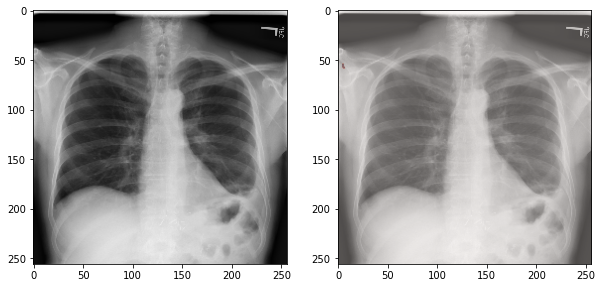

In [ ]:
for i in range(1, 11):
    image = decode_image('test_image' + str(i) + '.dcm')
    predicted  = model.predict(image[np.newaxis,:,:,:])
    predicted = predicted[0, :, :, 0]
    
    mask = predicted > 0.5
    if mask.sum():
      plt.figure(figsize=(10,6))
      plt.subplot(121)
      plt.imshow(image, cmap = plt.cm.bone)
      plt.subplot(122)
      plt.imshow(image, cmap = plt.cm.bone)
      plt.imshow(np.squeeze(mask), alpha = 0.3, cmap = 'Reds')
    else:
      print("This image does not have Pneumo")